In [4]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

In [5]:

def animate(x, yl, filename, interval=30):
    fig, ax = plt.subplots()
    N = len(yl)

    L = ax.plot(x, yl[0])[0]

    def update(frame):
        L.set_ydata(yl[frame])
        return L
    
    ani = animation.FuncAnimation(fig=fig, func=update, frames=N, interval=interval)
    plt.show()

    ani.save(filename=filename, writer="pillow")

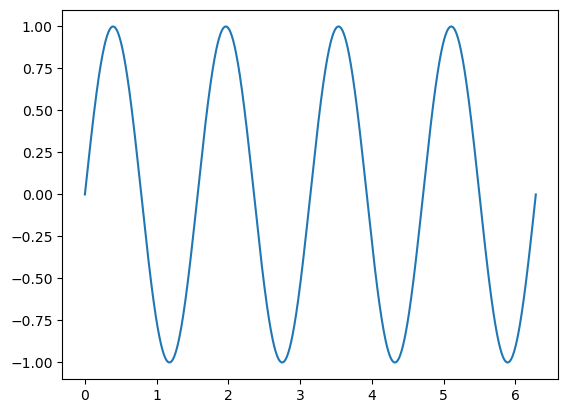

In [6]:
x = np.linspace(0,2*np.pi,1000)
yl = [np.sin(4*(x-0.1*t)) for t in np.linspace(0,2,100)]
animate(x,yl,'new.gif')
